In [5]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [6]:
# load dataset
dataset = pd.read_csv('pima-indians-diabetes.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [7]:
# attributes/ column refrence name

dataset.columns = ['PN', 'PGC', 'BP', 'SFT', 'SI', 'BMI' , 'DPF', 'Age', 'Class'] 

In [8]:
# prepare models
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ABC', AdaBoostClassifier()))

In [13]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
    

RFC: 0.765379 (0.061777)
BC: 0.740584 (0.073966)
ABC: 0.757553 (0.049499)


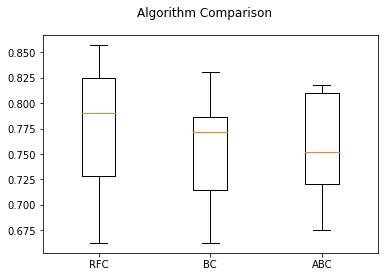

In [10]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()